In [1]:
import os
import sys
import shutil
import dotenv
from   dotenv import find_dotenv, load_dotenv
import matplotlib
load_dotenv(find_dotenv())
PATH_P     = os.environ['PATH_P']
os.chdir(PATH_P)
sys.path.insert(0, PATH_P)
import pandas as pd
from src.dst.outputhandler.pickle import tic,toc,pickle_save_,pickle_load
from src.dst.plots.plots import plotting_tool,retrieve_data,SeabornFig2Grid
from src.visualization.vis_LSTM_p.main import main_visualize
import  numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from src.visualization.vis_LSTM_p.main import main_visualize
from src.models.CMA_ES.CMA_ES import CMA_ES

## experiments

In [2]:
path                                  =   './models/test_shuffle/sneaky/DEEP2/bayes_opt/'
RD                                    = retrieve_data()
data,dict_,path_best,hist             = RD.get_best_D1(path)
data['df_t_val_train']                = pd.concat([data['df_t_train'],data['df_t_val']])
AUC_v_a                               = RD.get_all(path,'AUC_v')

val_loss_a                            = RD.get_all(path,'val_f')
dict_['AUC_v']                        = data['AUC_v']

RD.print_dict(dict_)

str_list                              = data['path_o'].split('/')
data['path_o']                        = path_best
BO_vis                                = plotting_tool(dict_)

lr           : 0.0031735
time_dim     : 21
encoder      : [368, 120]
decoder      : [386]
vector       : 368
AUC_v        : 0.6825618575185275


In [3]:
def return_dict():
    dict_c = {
        'path_i'   : './models/bayes_opt/DEEP2/',
        'path_save': './models/CMA_ES/DEEP2/',

        'resolution_AUC': 1000,

        ###### CMA_ES    ######
        'CMA_ES': True,
        'verbose_CMA': 1,
        'verbose_CMA_log': 0,
        'evals': 21*150,
        'bounds': [-100., 100.],
        'sigma': 0.4222222222222225,
        'progress_ST': 0.3,
        'popsize'    : 21,
        
        'mode'       : 'linear',

        'epoch': 0

    }

    return dict_c

## plus min sigmoid

In [4]:
dict_c = return_dict()
dict_c['mode']   = 'sigmoid'
dict_c['bounds'] = [-100,100]
path   = path_best.replace('bayes_opt','CMA_ES/pos_min_sigmoid')
CMA_ES(dict_c).main(data,path,dict_)

(10_w,21)-aCMA-ES (mu_w=6.2,w_1=27%) in dimension 360 (seed=509365, Fri Jun  8 16:02:01 2018)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     21 -7.137086486946169e-01 1.0e+00 4.15e-01  4e-01  4e-01 0:56.2
    2     42 -7.189975599704319e-01 1.0e+00 4.09e-01  4e-01  4e-01 1:04.8
    3     63 -7.212675070486109e-01 1.0e+00 4.03e-01  4e-01  4e-01 1:13.2
    4     84 -7.285090961423983e-01 1.0e+00 3.98e-01  4e-01  4e-01 1:23.7
    5    105 -7.329639490537526e-01 1.0e+00 3.94e-01  4e-01  4e-01 1:31.3
    6    126 -7.368922004095063e-01 1.0e+00 3.90e-01  4e-01  4e-01 1:39.4
    7    147 -7.388808572157496e-01 1.0e+00 3.86e-01  4e-01  4e-01 1:46.8
    8    168 -7.423348400897511e-01 1.0e+00 3.83e-01  4e-01  4e-01 1:54.5
    9    189 -7.464789653751300e-01 1.0e+00 3.80e-01  4e-01  4e-01 2:02.9
   10    210 -7.506427155632019e-01 1.0e+00 3.77e-01  4e-01  4e-01 2:11.1
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
   11    231 -7.539266

  100   2100 -9.176048460426384e-01 1.2e+00 4.77e-01  5e-01  5e-01 21:21.5
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  101   2121 -9.192729627715596e-01 1.2e+00 4.78e-01  5e-01  5e-01 22:05.3
  102   2142 -9.194724826156071e-01 1.2e+00 4.79e-01  5e-01  5e-01 22:11.5
  103   2163 -9.196000444831127e-01 1.2e+00 4.80e-01  5e-01  5e-01 22:17.9
  104   2184 -9.176277417624471e-01 1.2e+00 4.81e-01  5e-01  5e-01 22:23.5
  105   2205 -9.184421752242146e-01 1.2e+00 4.83e-01  5e-01  5e-01 22:29.6
  106   2226 -9.195477114092643e-01 1.2e+00 4.84e-01  5e-01  5e-01 22:36.1
  107   2247 -9.204700818358442e-01 1.2e+00 4.85e-01  5e-01  5e-01 22:42.2
  108   2268 -9.185272164692183e-01 1.2e+00 4.86e-01  5e-01  5e-01 22:48.4
  109   2289 -9.190701721103967e-01 1.2e+00 4.87e-01  5e-01  5e-01 22:54.9
  110   2310 -9.194561285300293e-01 1.2e+00 4.88e-01  5e-01  5e-01 23:01.0
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  111   2331 -9.204831651043064

In [5]:
df    = pickle_load(path+'best/df.p', None)
data  = pickle_load(path+'best/data_best.p', None)
dict_ = pickle_load(path+'dict.p', None)

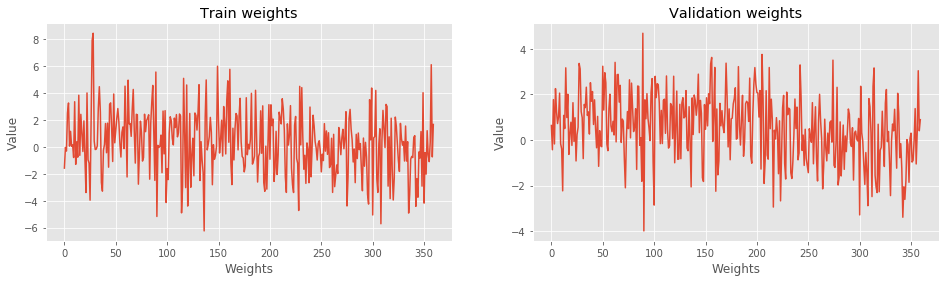

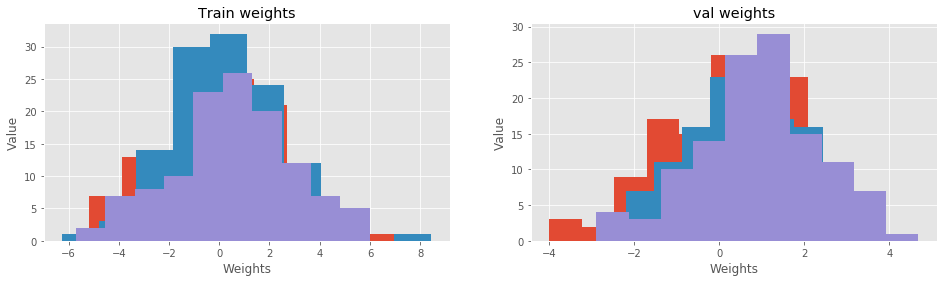

In [6]:
BO_vis.plot_weigths(data['x_tr'],data['x_v'])

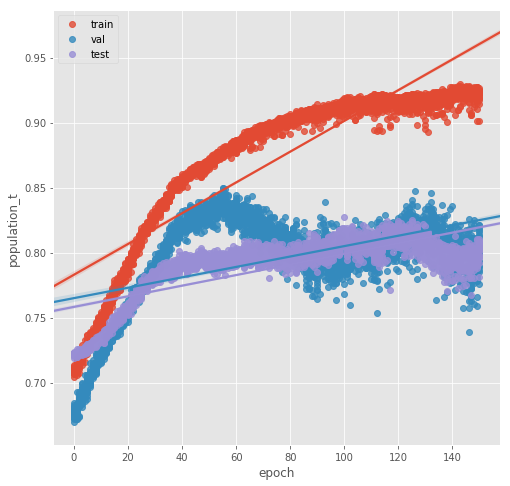

In [7]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()

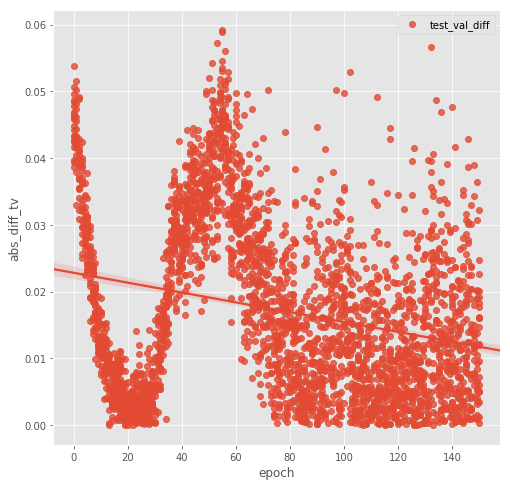

In [8]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.abs_diff_tv,label = 'test_val_diff')
plt.legend()

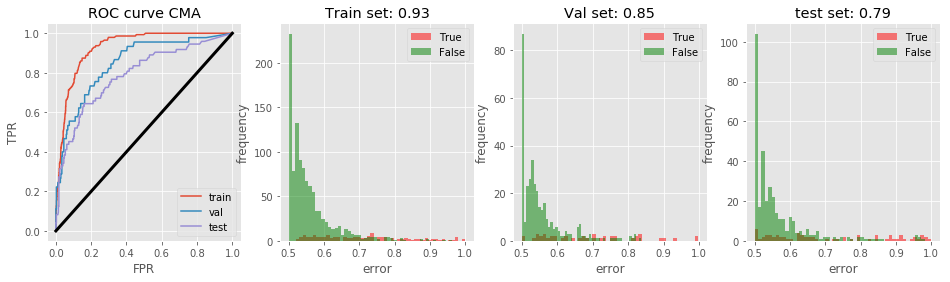

In [9]:
BO_vis.plot_cma(data)

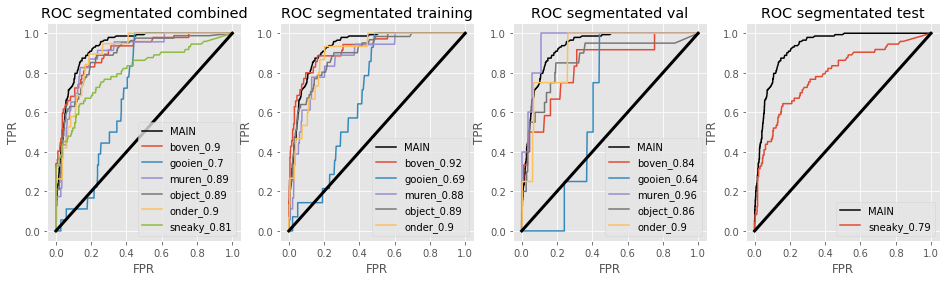

In [10]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'segmentation',cma = True)

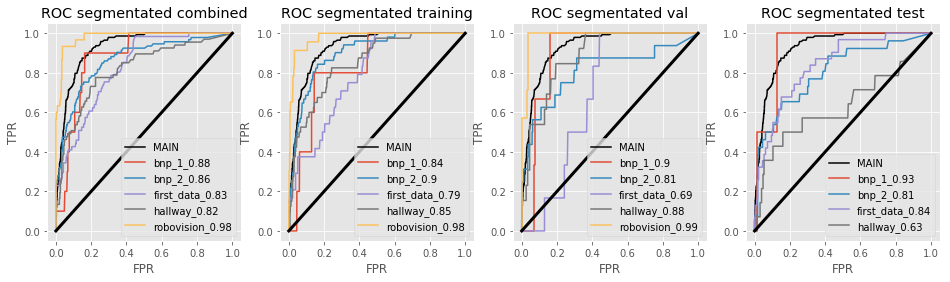

In [11]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'location',cma = True)

## plus sigmoid

In [12]:
dict_c = return_dict()
dict_c['mode']   = 'sigmoid'
dict_c['bounds'] = [0,100]
path   = path_best.replace('bayes_opt','CMA_ES/pos_sigmoid')
CMA_ES(dict_c).main(data,path,dict_)

(10_w,21)-aCMA-ES (mu_w=6.2,w_1=27%) in dimension 360 (seed=613425, Fri Jun  8 16:32:12 2018)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     21 -7.173000058874708e-01 1.0e+00 4.15e-01  4e-01  4e-01 0:42.2
    2     42 -7.207899677497434e-01 1.0e+00 4.09e-01  4e-01  4e-01 0:49.1
    3     63 -7.262849405038366e-01 1.0e+00 4.03e-01  4e-01  4e-01 0:55.2
    4     84 -7.336573622822453e-01 1.0e+00 3.99e-01  4e-01  4e-01 1:01.5
    5    105 -7.345208580007458e-01 1.0e+00 3.94e-01  4e-01  4e-01 1:05.5
    6    126 -7.393355007948086e-01 1.0e+00 3.90e-01  4e-01  4e-01 1:10.3
    7    147 -7.398719148017557e-01 1.0e+00 3.86e-01  4e-01  4e-01 1:16.3
    8    168 -7.452458673225745e-01 1.0e+00 3.83e-01  4e-01  4e-01 1:22.7
    9    189 -7.472672322999732e-01 1.0e+00 3.79e-01  4e-01  4e-01 1:28.6
   10    210 -7.503090922174178e-01 1.0e+00 3.76e-01  4e-01  4e-01 1:35.9
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
   11    231 -7.515323

Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  101   2121 -7.984914991463168e-01 1.1e+00 3.47e-01  3e-01  3e-01 24:53.1
  102   2142 -7.984555201580459e-01 1.1e+00 3.46e-01  3e-01  3e-01 25:02.1
  103   2163 -7.990573505073038e-01 1.1e+00 3.45e-01  3e-01  3e-01 25:11.1
  104   2184 -7.999306586771506e-01 1.1e+00 3.44e-01  3e-01  3e-01 25:18.6
  105   2205 -7.992241621801959e-01 1.2e+00 3.44e-01  3e-01  3e-01 25:26.2
  106   2226 -7.997605761871430e-01 1.2e+00 3.43e-01  3e-01  3e-01 25:33.6
  107   2247 -8.004768851354445e-01 1.2e+00 3.42e-01  3e-01  3e-01 25:40.4
  108   2268 -8.008235917496909e-01 1.2e+00 3.41e-01  3e-01  3e-01 25:50.0
  109   2289 -8.000745746302340e-01 1.2e+00 3.40e-01  3e-01  3e-01 25:57.2
  110   2310 -8.012684228774032e-01 1.2e+00 3.40e-01  3e-01  3e-01 26:05.4
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  111   2331 -8.007843419443046e-01 1.2e+00 3.39e-01  3e-01  3e-01 26:57.0
  112   2352 -8.014810259899128

In [13]:
df    = pickle_load(path+'best/df.p', None)
data  = pickle_load(path+'best/data_best.p', None)
dict_ = pickle_load(path+'dict.p', None)

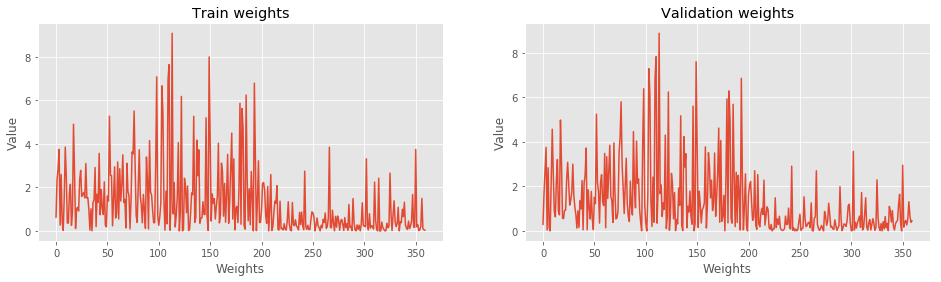

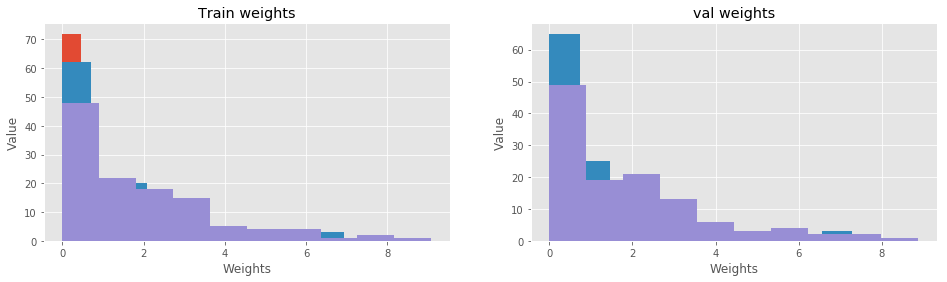

In [14]:
BO_vis.plot_weigths(data['x_tr'],data['x_v'])

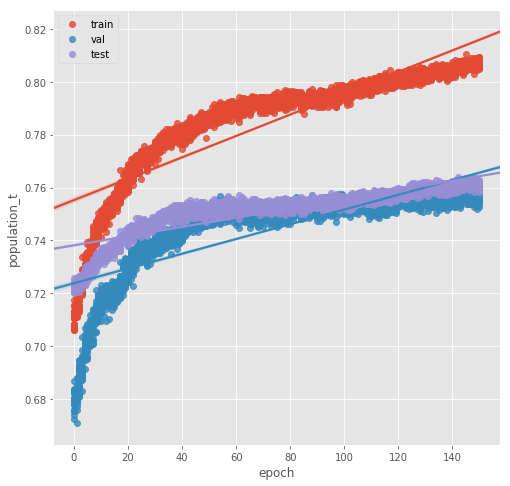

In [15]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()

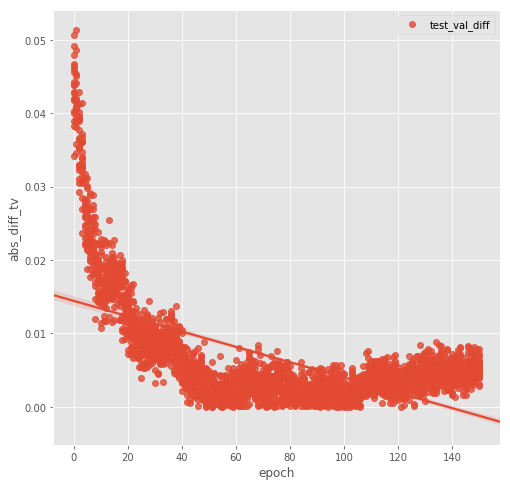

In [16]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.abs_diff_tv,label = 'test_val_diff')
plt.legend()

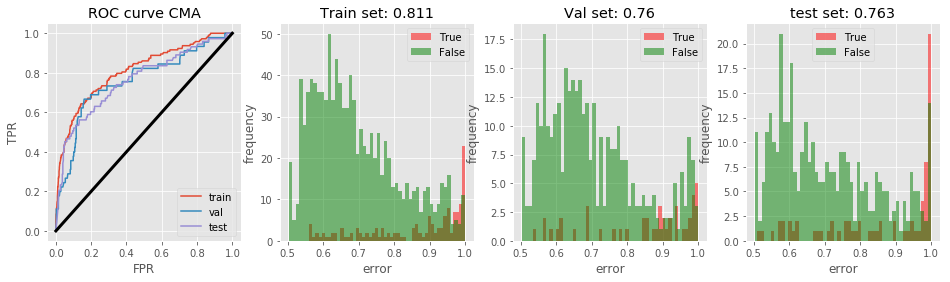

In [17]:
BO_vis.plot_cma(data)

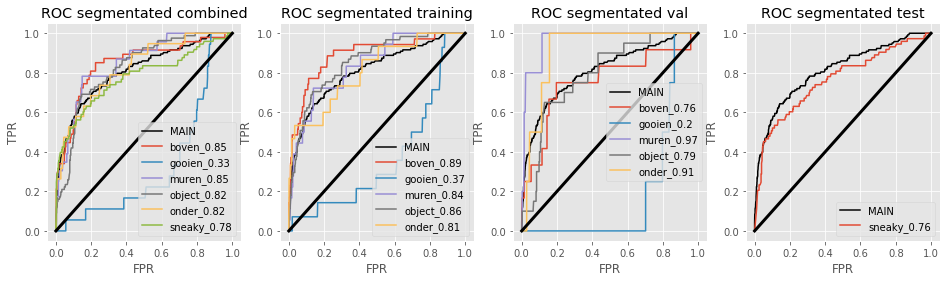

In [18]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'segmentation',cma = True)

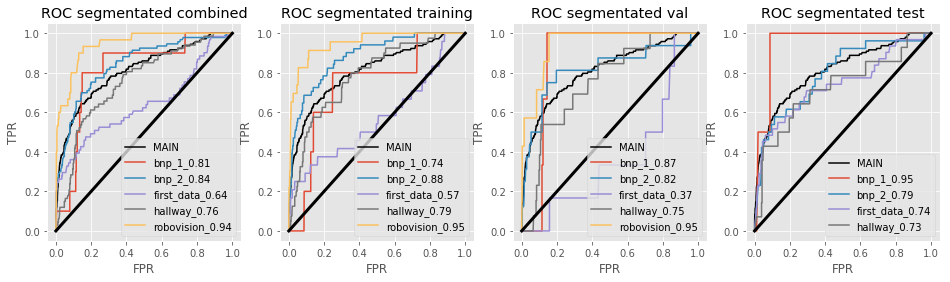

In [19]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'location',cma = True)

# DEEP2

In [20]:
# path                                  =  './models/CMA_ES/DEEP2/'
# path_a                                = [path]
# RD                                    = retrieve_data()
# df,dict_,path_best                    = RD.get_max_CMA(path)


# BO_vis                                = plotting_tool(dict_['dict_config'])

# df                                     = df[df['epoch'] < 150]
# array_AUC_tr_a                         = RD.get_all_cma(path_a,'AUC_tr')
# array_AUC_v_a                          = RD.get_all_cma(path_a,'AUC_v')
# array_AUC_t_a                          = RD.get_all_cma(path_a,'AUC_t')

NameError: name 'array_AUC_tr_a' is not defined

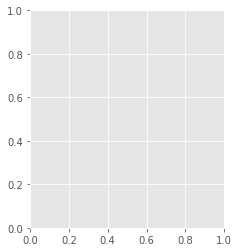

In [21]:
fig = plt.figure(figsize=(16,4))

ax1 = plt.subplot(141)
ax1 = plt.hist(array_AUC_tr_a)

ax2 = plt.subplot(142)
ax2 = plt.hist(array_AUC_v_a)

ax3 = plt.subplot(143)
ax3 = plt.hist(array_AUC_t_a)


ax4 = plt.subplot(144)
ax4 = plt.plot(array_AUC_tr_a,label = 'train')
ax4 = plt.plot(array_AUC_v_a,label = 'val')
ax4 = plt.plot(array_AUC_t_a,label = 'test')
plt.legend()
plt.show()


In [ ]:
BO_vis.plot_weigths(dict_['x_tr'],dict_['x_v'])

In [ ]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))



ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()
plt.savefig('./plots/pic/CMA_training')

In [ ]:
BO_vis.plot_cma(dict_)

In [ ]:
dict_['path_o'] = dict_['dict_config']['path_save']
BO_vis.save_ROC_segment(dict_,'segmentation',cma = True)

In [ ]:
dict_['path_o'] = dict_['dict_config']['path_save']
BO_vis.save_ROC_segment(dict_,'location',cma = True)

In [ ]:
dict_c = {
        'path'       :  path_best+'/',
        'mode'       : 'df_t_train',

        'path_dict'  : path_best+'/dict.p',

        'plot_mode'  : 'error'


}
vis = main_visualize(dict_c)
vis.play_videos()


In [ ]:
path_best+'/dict.p'